## Задача о назначениях
Необходимо собрать команду разработчиков для создания компьтерной игры. Необходимо выбрать: художника, тестировщика, сценариста, композитора, геймдизайнера и программиста. На выбор даны девять кандидатов. Известны заработная плата, которую они хотят, а также степень их заинтересованности. Необходимо назначить кандидатов так, чтобы на каждую должность должен быть назначен сотрудник.Заинтересованность кандидатов должна быть максимальной, а зарплата как можно более низкой.

### Загружаем исходные данные

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [38]:
import pandas as pd
import numpy as np

df_salary_org = pd.read_csv('/content/gdrive/MyDrive/TPR/Z1/Data_salary.csv', encoding="cp1251", sep=';')
df_salary_org

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог
0,Исполнитель1,50,80,90,70,40,90
1,Исполнитель2,90,60,30,50,80,60
2,Исполнитель3,20,50,70,80,40,30
3,Исполнитель4,70,80,60,40,30,50
4,Исполнитель5,100,30,50,90,50,80
5,Исполнитель6,30,60,40,60,20,70
6,Исполнитель7,60,40,20,30,60,50
7,Исполнитель8,40,30,80,50,70,40
8,Исполнитель9,80,70,50,70,80,20


In [39]:
df_motivation_org = pd.read_csv('/content/gdrive/MyDrive/TPR/Z1/Data_motivation.csv', encoding="cp1251", sep=';')
df_motivation_org

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог
0,Исполнитель1,90,60,50,30,50,80
1,Исполнитель2,50,90,30,60,80,20
2,Исполнитель3,70,80,50,70,40,40
3,Исполнитель4,40,70,60,80,30,90
4,Исполнитель5,70,50,90,80,40,50
5,Исполнитель6,50,40,80,30,70,50
6,Исполнитель7,30,50,20,40,60,70
7,Исполнитель8,60,30,40,20,20,60
8,Исполнитель9,90,20,70,50,40,80


### Устанавливаем библиотеку

In [40]:
pip install hungarian-algorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import numpy as np
from hungarian_algorithm import algorithm

### Добавляем 3 фиктивные должности 

In [42]:
import random
numbers = [20, 30, 40, 50, 60, 70, 80, 90]

line = ''

for i in range(9):
     line = line + str(random.choice(numbers)) + ', '
line

'40, 20, 60, 20, 40, 50, 30, 20, 70, '

In [43]:
df_salary_org["Fake1"] = [20, 50, 70, 80, 40, 60, 50, 30, 40]
df_salary_org["Fake2"] = [90, 30, 60, 40, 50, 90, 20, 90, 40]
df_salary_org["Fake3"] = [70, 30, 80, 40, 30, 80, 40, 50, 50]
df_motivation_org["Fake1"] = [40, 40, 20, 50, 30, 90, 80, 20, 60]
df_motivation_org["Fake2"] = [60, 40, 60, 50, 50, 90, 50, 60, 30]
df_motivation_org["Fake3"] = [70, 20, 40, 80, 20, 90, 20, 60, 80]

In [44]:
df_salary_org

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог,Fake1,Fake2,Fake3
0,Исполнитель1,50,80,90,70,40,90,20,90,70
1,Исполнитель2,90,60,30,50,80,60,50,30,30
2,Исполнитель3,20,50,70,80,40,30,70,60,80
3,Исполнитель4,70,80,60,40,30,50,80,40,40
4,Исполнитель5,100,30,50,90,50,80,40,50,30
5,Исполнитель6,30,60,40,60,20,70,60,90,80
6,Исполнитель7,60,40,20,30,60,50,50,20,40
7,Исполнитель8,40,30,80,50,70,40,30,90,50
8,Исполнитель9,80,70,50,70,80,20,40,40,50


In [45]:
df_motivation_org

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог,Fake1,Fake2,Fake3
0,Исполнитель1,90,60,50,30,50,80,40,60,70
1,Исполнитель2,50,90,30,60,80,20,40,40,20
2,Исполнитель3,70,80,50,70,40,40,20,60,40
3,Исполнитель4,40,70,60,80,30,90,50,50,80
4,Исполнитель5,70,50,90,80,40,50,30,50,20
5,Исполнитель6,50,40,80,30,70,50,90,90,90
6,Исполнитель7,30,50,20,40,60,70,80,50,20
7,Исполнитель8,60,30,40,20,20,60,20,60,60
8,Исполнитель9,90,20,70,50,40,80,60,30,80


### Преобразуем таблицы в массивы

In [46]:
df_salary = df_salary_org.drop('Исполнители', axis=1)
df_salary

,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог,Fake1,Fake2,Fake3
0,50,80,90,70,40,90,20,90,70
1,90,60,30,50,80,60,50,30,30
2,20,50,70,80,40,30,70,60,80
3,70,80,60,40,30,50,80,40,40
4,100,30,50,90,50,80,40,50,30
5,30,60,40,60,20,70,60,90,80
6,60,40,20,30,60,50,50,20,40
7,40,30,80,50,70,40,30,90,50
8,80,70,50,70,80,20,40,40,50


In [47]:
tab_salary = np.array(df_salary)
tab_salary

array([[ 50,  80,  90,  70,  40,  90,  20,  90,  70],
       [ 90,  60,  30,  50,  80,  60,  50,  30,  30],
       [ 20,  50,  70,  80,  40,  30,  70,  60,  80],
       [ 70,  80,  60,  40,  30,  50,  80,  40,  40],
       [100,  30,  50,  90,  50,  80,  40,  50,  30],
       [ 30,  60,  40,  60,  20,  70,  60,  90,  80],
       [ 60,  40,  20,  30,  60,  50,  50,  20,  40],
       [ 40,  30,  80,  50,  70,  40,  30,  90,  50],
       [ 80,  70,  50,  70,  80,  20,  40,  40,  50]])

In [48]:
df_motivation = df_motivation_org.drop('Исполнители', axis=1)
tab_motivation = np.array(df_motivation)
tab_motivation

array([[90, 60, 50, 30, 50, 80, 40, 60, 70],
       [50, 90, 30, 60, 80, 20, 40, 40, 20],
       [70, 80, 50, 70, 40, 40, 20, 60, 40],
       [40, 70, 60, 80, 30, 90, 50, 50, 80],
       [70, 50, 90, 80, 40, 50, 30, 50, 20],
       [50, 40, 80, 30, 70, 50, 90, 90, 90],
       [30, 50, 20, 40, 60, 70, 80, 50, 20],
       [60, 30, 40, 20, 20, 60, 20, 60, 60],
       [90, 20, 70, 50, 40, 80, 60, 30, 80]])

### Находим суммы значений для каждого столбца

In [49]:
sum_motivation = list(map(sum,zip(*tab_motivation)))
sum_motivation

[550, 490, 490, 460, 430, 540, 430, 490, 480]

In [51]:
list_motivation = np.array(tab_motivation).tolist()
list_salary = np.array(tab_salary).tolist()

In [52]:
for i in range(len(list_salary)):
  for j in range(len(list_salary)):
    list_salary[j][i]=int(100-list_salary[j][i])
print(np.copy(list_salary))

[[50 20 10 30 60 10 80 10 30]
 [10 40 70 50 20 40 50 70 70]
 [80 50 30 20 60 70 30 40 20]
 [30 20 40 60 70 50 20 60 60]
 [ 0 70 50 10 50 20 60 50 70]
 [70 40 60 40 80 30 40 10 20]
 [40 60 80 70 40 50 50 80 60]
 [60 70 20 50 30 60 70 10 50]
 [20 30 50 30 20 80 60 60 50]]


### Производим нормализацию таблиц

In [16]:
sum_salary = list(map(sum,zip(*list_salary)))
sum_salary

[360, 400, 410, 360, 430, 410, 460, 390, 430]

In [17]:
for i in range(len(list_salary)):
  for j in range(len(list_salary)):
    list_salary_temp[j][i]=float(list_salary[j][i])/float(sum_salary[i])
print(np.copy(list_salary_temp))

[[0.13888889 0.05       0.02439024 0.08333333 0.13953488 0.02439024
  0.17391304 0.02564103 0.06976744]
 [0.02777778 0.1        0.17073171 0.13888889 0.04651163 0.09756098
  0.10869565 0.17948718 0.1627907 ]
 [0.22222222 0.125      0.07317073 0.05555556 0.13953488 0.17073171
  0.06521739 0.1025641  0.04651163]
 [0.08333333 0.05       0.09756098 0.16666667 0.1627907  0.12195122
  0.04347826 0.15384615 0.13953488]
 [0.         0.175      0.12195122 0.02777778 0.11627907 0.04878049
  0.13043478 0.12820513 0.1627907 ]
 [0.19444444 0.1        0.14634146 0.11111111 0.18604651 0.07317073
  0.08695652 0.02564103 0.04651163]
 [0.11111111 0.15       0.19512195 0.19444444 0.09302326 0.12195122
  0.10869565 0.20512821 0.13953488]
 [0.16666667 0.175      0.04878049 0.13888889 0.06976744 0.14634146
  0.15217391 0.02564103 0.11627907]
 [0.05555556 0.075      0.12195122 0.08333333 0.04651163 0.19512195
  0.13043478 0.15384615 0.11627907]]


In [18]:
for i in range(len(list_salary)):
  for j in range(len(list_salary)):
    list_motivation[j][i]=float(list_motivation[j][i])/float(sum_motivation[i])
print(np.copy(list_motivation))

[[0.16363636 0.12244898 0.10204082 0.06521739 0.11627907 0.14814815
  0.09302326 0.12244898 0.14583333]
 [0.09090909 0.18367347 0.06122449 0.13043478 0.18604651 0.03703704
  0.09302326 0.08163265 0.04166667]
 [0.12727273 0.16326531 0.10204082 0.15217391 0.09302326 0.07407407
  0.04651163 0.12244898 0.08333333]
 [0.07272727 0.14285714 0.12244898 0.17391304 0.06976744 0.16666667
  0.11627907 0.10204082 0.16666667]
 [0.12727273 0.10204082 0.18367347 0.17391304 0.09302326 0.09259259
  0.06976744 0.10204082 0.04166667]
 [0.09090909 0.08163265 0.16326531 0.06521739 0.1627907  0.09259259
  0.20930233 0.18367347 0.1875    ]
 [0.05454545 0.10204082 0.04081633 0.08695652 0.13953488 0.12962963
  0.18604651 0.10204082 0.04166667]
 [0.10909091 0.06122449 0.08163265 0.04347826 0.04651163 0.11111111
  0.04651163 0.12244898 0.125     ]
 [0.16363636 0.04081633 0.14285714 0.10869565 0.09302326 0.14814815
  0.13953488 0.06122449 0.16666667]]


### Создаем таблицу для общих критериев

In [19]:
list_comb = list_salary_temp
for i in range(len(list_salary_temp)):
  for j in range(len(list_salary_temp)):
    list_comb[i][j]=(list_motivation[i][j]+list_salary_temp[i][j])/2

print(np.copy(list_comb))

[[0.15126263 0.08622449 0.06321553 0.07427536 0.12790698 0.0862692
  0.13346815 0.074045   0.10780039]
 [0.05934343 0.14183673 0.1159781  0.13466184 0.11627907 0.06729901
  0.10085945 0.13055992 0.10222868]
 [0.17474747 0.14413265 0.08760577 0.10386473 0.11627907 0.12240289
  0.05586451 0.11250654 0.06492248]
 [0.0780303  0.09642857 0.11000498 0.17028986 0.11627907 0.14430894
  0.07987867 0.12794349 0.15310078]
 [0.06363636 0.13852041 0.15281234 0.10084541 0.10465116 0.07068654
  0.10010111 0.11512297 0.10222868]
 [0.14267677 0.09081633 0.15480338 0.08816425 0.1744186  0.08288166
  0.14812942 0.10465725 0.11700581]
 [0.08282828 0.12602041 0.11796914 0.14070048 0.11627907 0.12579042
  0.14737108 0.15358451 0.09060078]
 [0.13787879 0.11811224 0.06520657 0.09118357 0.05813953 0.12872629
  0.09934277 0.074045   0.12063953]
 [0.10959596 0.05790816 0.13240418 0.09601449 0.06976744 0.17163505
  0.13498483 0.10753532 0.14147287]]


### Конвертируем все данные в словари, с которыми работает библиотека

In [57]:
#https://stackoverflow.com/questions/26716616/convert-a-pandas-dataframe-to-a-dictionary

isp1 = list_comb[0]
isp2 = list_comb[1]
isp3 = list_comb[2]
isp4 = list_comb[3]
isp5 = list_comb[4]
isp6 = list_comb[5]
isp7 = list_comb[6]
isp8 = list_comb[7]
isp9 = list_comb[8]


res = pd.DataFrame([isp1, isp2, isp3, isp4, isp5, isp6, isp7, isp8, isp9], 
             columns=['Художник', 'Тестировщик', 'Сценарист', 'Композитор', 'Геймдизайнер', 'Маркетолог', 'Fake1', 'Fake2', 'Fake3'])

In [58]:
res

,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог,Fake1,Fake2,Fake3
0,0.151263,0.086224,0.063216,0.074275,0.127907,0.086269,0.133468,0.074045,0.107800
1,0.059343,0.141837,0.115978,0.134662,0.116279,0.067299,0.100859,0.130560,0.102229
2,0.174747,0.144133,0.087606,0.103865,0.116279,0.122403,0.055865,0.112507,0.064922
3,0.078030,0.096429,0.110005,0.170290,0.116279,0.144309,0.079879,0.127943,0.153101
4,0.063636,0.138520,0.152812,0.100845,0.104651,0.070687,0.100101,0.115123,0.102229
5,0.142677,0.090816,0.154803,0.088164,0.174419,0.082882,0.148129,0.104657,0.117006
6,0.082828,0.126020,0.117969,0.140700,0.116279,0.125790,0.147371,0.153585,0.090601
7,0.137879,0.118112,0.065207,0.091184,0.058140,0.128726,0.099343,0.074045,0.120640
8,0.109596,0.057908,0.132404,0.096014,0.069767,0.171635,0.134985,0.107535,0.141473


In [59]:
# New column to be added
new_col = ['Исполнитель1', 'Исполнитель2', 'Исполнитель3', 'Исполнитель4', 'Исполнитель5', 'Исполнитель6', 'Исполнитель7', 'Исполнитель8', 'Исполнитель9']
 
# Inserting the column at the
# beginning in the DataFrame
res.insert(loc = 0,
           column = 'Исполнители',
          value = new_col)
# show the dataframe
res

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог,Fake1,Fake2,Fake3
0,Исполнитель1,0.151263,0.086224,0.063216,0.074275,0.127907,0.086269,0.133468,0.074045,0.107800
1,Исполнитель2,0.059343,0.141837,0.115978,0.134662,0.116279,0.067299,0.100859,0.130560,0.102229
2,Исполнитель3,0.174747,0.144133,0.087606,0.103865,0.116279,0.122403,0.055865,0.112507,0.064922
3,Исполнитель4,0.078030,0.096429,0.110005,0.170290,0.116279,0.144309,0.079879,0.127943,0.153101
4,Исполнитель5,0.063636,0.138520,0.152812,0.100845,0.104651,0.070687,0.100101,0.115123,0.102229
5,Исполнитель6,0.142677,0.090816,0.154803,0.088164,0.174419,0.082882,0.148129,0.104657,0.117006
6,Исполнитель7,0.082828,0.126020,0.117969,0.140700,0.116279,0.125790,0.147371,0.153585,0.090601
7,Исполнитель8,0.137879,0.118112,0.065207,0.091184,0.058140,0.128726,0.099343,0.074045,0.120640
8,Исполнитель9,0.109596,0.057908,0.132404,0.096014,0.069767,0.171635,0.134985,0.107535,0.141473


In [60]:
res = res.set_index('Исполнители')
res.index.names = [None]
dict_comb = res.to_dict('index')
dict_comb

{'Исполнитель1': {'Художник': 0.15126262626262627,
  'Тестировщик': 0.08622448979591837,
  'Сценарист': 0.06321553011448482,
  'Композитор': 0.07427536231884058,
  'Геймдизайнер': 0.12790697674418605,
  'Маркетолог': 0.08626919602529358,
  'Fake1': 0.13346814964610718,
  'Fake2': 0.07404500261643118,
  'Fake3': 0.10780038759689922},
 'Исполнитель2': {'Художник': 0.059343434343434344,
  'Тестировщик': 0.14183673469387756,
  'Сценарист': 0.11597809855649577,
  'Композитор': 0.13466183574879226,
  'Геймдизайнер': 0.11627906976744186,
  'Маркетолог': 0.06729900632339657,
  'Fake1': 0.10085945399393326,
  'Fake2': 0.130559916274202,
  'Fake3': 0.10222868217054264},
 'Исполнитель3': {'Художник': 0.17474747474747473,
  'Тестировщик': 0.14413265306122447,
  'Сценарист': 0.08760577401692385,
  'Композитор': 0.10386473429951691,
  'Геймдизайнер': 0.11627906976744186,
  'Маркетолог': 0.12240289069557363,
  'Fake1': 0.055864509605662284,
  'Fake2': 0.11250654107796965,
  'Fake3': 0.064922480620155

In [53]:
isp1 = list_salary[0]
isp2 = list_salary[1]
isp3 = list_salary[2]
isp4 = list_salary[3]
isp5 = list_salary[4]
isp6 = list_salary[5]
isp7 = list_salary[6]
isp8 = list_salary[7]
isp9 = list_salary[8]


df_salary = pd.DataFrame([isp1, isp2, isp3, isp4, isp5, isp6, isp7, isp8, isp9], 
             columns=['Художник', 'Тестировщик', 'Сценарист', 'Композитор', 'Геймдизайнер', 'Маркетолог', 'Fake1', 'Fake2', 'Fake3'])
new_col = ['Исполнитель1', 'Исполнитель2', 'Исполнитель3', 'Исполнитель4', 'Исполнитель5', 'Исполнитель6', 'Исполнитель7', 'Исполнитель8', 'Исполнитель9']
 
df_salary.insert(loc = 0,
           column = 'Исполнители',
          value = new_col)

df_salary

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог,Fake1,Fake2,Fake3
0,Исполнитель1,50,20,10,30,60,10,80,10,30
1,Исполнитель2,10,40,70,50,20,40,50,70,70
2,Исполнитель3,80,50,30,20,60,70,30,40,20
3,Исполнитель4,30,20,40,60,70,50,20,60,60
4,Исполнитель5,0,70,50,10,50,20,60,50,70
5,Исполнитель6,70,40,60,40,80,30,40,10,20
6,Исполнитель7,40,60,80,70,40,50,50,80,60
7,Исполнитель8,60,70,20,50,30,60,70,10,50
8,Исполнитель9,20,30,50,30,20,80,60,60,50


In [54]:
df_salary = df_salary.set_index('Исполнители')
df_salary.index.names = [None]
dict_salary = df_salary.to_dict('index')
dict_salary

{'Исполнитель1': {'Художник': 50,
  'Тестировщик': 20,
  'Сценарист': 10,
  'Композитор': 30,
  'Геймдизайнер': 60,
  'Маркетолог': 10,
  'Fake1': 80,
  'Fake2': 10,
  'Fake3': 30},
 'Исполнитель2': {'Художник': 10,
  'Тестировщик': 40,
  'Сценарист': 70,
  'Композитор': 50,
  'Геймдизайнер': 20,
  'Маркетолог': 40,
  'Fake1': 50,
  'Fake2': 70,
  'Fake3': 70},
 'Исполнитель3': {'Художник': 80,
  'Тестировщик': 50,
  'Сценарист': 30,
  'Композитор': 20,
  'Геймдизайнер': 60,
  'Маркетолог': 70,
  'Fake1': 30,
  'Fake2': 40,
  'Fake3': 20},
 'Исполнитель4': {'Художник': 30,
  'Тестировщик': 20,
  'Сценарист': 40,
  'Композитор': 60,
  'Геймдизайнер': 70,
  'Маркетолог': 50,
  'Fake1': 20,
  'Fake2': 60,
  'Fake3': 60},
 'Исполнитель5': {'Художник': 0,
  'Тестировщик': 70,
  'Сценарист': 50,
  'Композитор': 10,
  'Геймдизайнер': 50,
  'Маркетолог': 20,
  'Fake1': 60,
  'Fake2': 50,
  'Fake3': 70},
 'Исполнитель6': {'Художник': 70,
  'Тестировщик': 40,
  'Сценарист': 60,
  'Композитор': 4

In [55]:
df_motivation  = df_motivation_org.set_index('Исполнители')
df_motivation.index.names = [None]
dict_motivation  = df_motivation.to_dict('index')
dict_motivation 

{'Исполнитель1': {'Художник': 90,
  'Тестировщик': 60,
  'Сценарист': 50,
  'Композитор': 30,
  'Геймдизайнер': 50,
  'Маркетолог': 80,
  'Fake1': 40,
  'Fake2': 60,
  'Fake3': 70},
 'Исполнитель2': {'Художник': 50,
  'Тестировщик': 90,
  'Сценарист': 30,
  'Композитор': 60,
  'Геймдизайнер': 80,
  'Маркетолог': 20,
  'Fake1': 40,
  'Fake2': 40,
  'Fake3': 20},
 'Исполнитель3': {'Художник': 70,
  'Тестировщик': 80,
  'Сценарист': 50,
  'Композитор': 70,
  'Геймдизайнер': 40,
  'Маркетолог': 40,
  'Fake1': 20,
  'Fake2': 60,
  'Fake3': 40},
 'Исполнитель4': {'Художник': 40,
  'Тестировщик': 70,
  'Сценарист': 60,
  'Композитор': 80,
  'Геймдизайнер': 30,
  'Маркетолог': 90,
  'Fake1': 50,
  'Fake2': 50,
  'Fake3': 80},
 'Исполнитель5': {'Художник': 70,
  'Тестировщик': 50,
  'Сценарист': 90,
  'Композитор': 80,
  'Геймдизайнер': 40,
  'Маркетолог': 50,
  'Fake1': 30,
  'Fake2': 50,
  'Fake3': 20},
 'Исполнитель6': {'Художник': 50,
  'Тестировщик': 40,
  'Сценарист': 80,
  'Композитор': 

### Преобразуем данные в словари с которыми работает библиотека 

In [33]:
dict_comb = {  
    'Исполнитель1':{'Художник':0.12811448, 'Тестировщик':0.14122449, 'Сценарист':0.14285714, 'Композитор':0.09742351,	'Геймдизайнер':0.10069273, 'Маркетолог':0.18367347, 'Fake1':0.12076649, 'Fake2':0.13993711, 'Fake3':0.10102041},
    'Исполнитель2':{'Художник':0.12878788, 'Тестировщик':0.15183673, 'Сценарист':0.06122449, 'Композитор':0.11151369,	'Геймдизайнер':0.17812964, 'Маркетолог':0.12244898, 'Fake1':0.08622995, 'Fake2':0.14240791, 'Fake3':0.12081633},
    'Исполнитель3':{'Художник':0.08215488, 'Тестировщик':0.13163265, 'Сценарист':0.12244898, 'Композитор':0.15016103,	'Геймдизайнер':0.08906482, 'Маркетолог':0.06122449, 'Fake1':0.14817291, 'Fake2':0.10916442, 'Fake3':0.08040816},
    'Исполнитель4':{'Художник':0.10117845, 'Тестировщик':0.15142857, 'Сценарист':0.12244898, 'Композитор':0.12399356,	'Геймдизайнер':0.06679861, 'Маркетолог':0.10204082, 'Fake1':0.17914439, 'Fake2':0.0853549, 'Fake3': 0.12102041},
    'Исполнитель5':{'Художник':0.15622896, 'Тестировщик':0.08102041, 'Сценарист':0.14285714, 'Композитор':0.17028986,	'Геймдизайнер':0.09970312, 'Маркетолог':0.16326531, 'Fake1':0.09447415, 'Fake2':0.10175202, 'Fake3':0.09122449},
    'Исполнитель6':{'Художник':0.07323232, 'Тестировщик':0.10081633, 'Сценарист':0.12244898, 'Композитор':0.08816425,	'Геймдизайнер':0.10267194, 'Маркетолог':0.14285714, 'Fake1':0.08778966, 'Fake2':0.12309075, 'Fake3':0.11142857},
    'Исполнитель7':{'Художник':0.08282828, 'Тестировщик':0.09102041, 'Сценарист':0.04081633, 'Композитор':0.07125604,	'Геймдизайнер':0.13359723, 'Маркетолог':0.10204082, 'Fake1':0.11564171, 'Fake2':0.14442947, 'Fake3':0.11163265},
    'Исполнитель8':{'Художник':0.09158249, 'Тестировщик':0.06061224, 'Сценарист':0.12244898, 'Композитор':0.06803543,	'Геймдизайнер':0.0977239, 'Маркетолог':0.08163265, 'Fake1':0.0733066, 'Fake2':0.05211141, 'Fake3':0.12061224},
    'Исполнитель9':{'Художник':0.15589226, 'Тестировщик':0.09040816, 'Сценарист':0.12244898, 'Композитор':0.11916264,	'Геймдизайнер':0.13161801, 'Маркетолог':0.04081633, 'Fake1':0.09447415, 'Fake2':0.10175202, 'Fake3':0.14183673},
}


In [34]:
dict_salary = {
    'Исполнитель1':{'Художник':50, 'Тестировщик':80, 'Сценарист':90, 'Композитор':70, 'Геймдизайнер':40, 'Маркетолог':90, 'Fake1':20, 'Fake2':70, 'Fake3':50},
    'Исполнитель2':{'Художник':90, 'Тестировщик':60, 'Сценарист':30, 'Композитор':50, 'Геймдизайнер':80, 'Маркетолог':60, 'Fake1':50, 'Fake2':80, 'Fake3':40},
    'Исполнитель3':{'Художник':20, 'Тестировщик':50, 'Сценарист':70, 'Композитор':80, 'Геймдизайнер':40, 'Маркетолог':30, 'Fake1':70, 'Fake2':60, 'Fake3':20},
    'Исполнитель4':{'Художник':70, 'Тестировщик':80, 'Сценарист':60, 'Композитор':40, 'Геймдизайнер':30, 'Маркетолог':50, 'Fake1':80, 'Fake2':40, 'Fake3':50},
    'Исполнитель5':{'Художник':100, 'Тестировщик':30, 'Сценарист':50, 'Композитор':90, 'Геймдизайнер':50, 'Маркетолог':80, 'Fake1':40, 'Fake2':30, 'Fake3':60},
    'Исполнитель6':{'Художник':30, 'Тестировщик':60, 'Сценарист':40, 'Композитор':60, 'Геймдизайнер':20, 'Маркетолог':70, 'Fake1':60, 'Fake2':40, 'Fake3':70},
    'Исполнитель7':{'Художник':60, 'Тестировщик':40, 'Сценарист':20, 'Композитор':30, 'Геймдизайнер':60, 'Маркетолог':50, 'Fake1':50, 'Fake2':50, 'Fake3':80},
    'Исполнитель8':{'Художник':40, 'Тестировщик':30, 'Сценарист':80, 'Композитор':50, 'Геймдизайнер':70, 'Маркетолог':40, 'Fake1':30, 'Fake2':20, 'Fake3':30},
    'Исполнитель9':{'Художник':80, 'Тестировщик':70, 'Сценарист':50, 'Композитор':70, 'Геймдизайнер':80, 'Маркетолог':20, 'Fake1':40, 'Fake2':30, 'Fake3':90},
}


In [35]:
dict_motivation = {
    'Исполнитель1':{'Художник':90,  'Тестировщик':60,  'Сценарист':50,  'Композитор':30,  'Геймдизайнер':50,  'Маркетолог':90, 'Fake1':100,  'Fake2':60,  'Fake3':50},
    'Исполнитель2':{'Художник':50,  'Тестировщик':90,  'Сценарист':30,  'Композитор':60,  'Геймдизайнер':80,  'Маркетолог':60,  'Fake1':30,  'Fake2':50,  'Fake3':80},
    'Исполнитель3':{'Художник':70,  'Тестировщик':80,  'Сценарист':50,  'Композитор':70,  'Геймдизайнер':40,  'Маркетолог':30,  'Fake1':70,  'Fake2':40,  'Fake3':60},
    'Исполнитель4':{'Художник':40,  'Тестировщик':70,  'Сценарист':60,  'Композитор':80,  'Геймдизайнер':30,  'Маркетолог':50,  'Fake1':90,  'Fake2':40,  'Fake3':70},
    'Исполнитель5':{'Художник':70,  'Тестировщик':50,  'Сценарист':90,  'Композитор':80,  'Геймдизайнер':40,  'Маркетолог':80,  'Fake1':50,  'Fake2':70, 'Fake3':30},
    'Исполнитель6':{'Художник':50,  'Тестировщик':40,  'Сценарист':80,  'Композитор':30,  'Геймдизайнер':70,  'Маркетолог':70,  'Fake1':20,  'Fake2':80,  'Fake3':40},
    'Исполнитель7':{'Художник':30,  'Тестировщик':50,  'Сценарист':20,  'Композитор':40,  'Геймдизайнер':60,  'Маркетолог':50,  'Fake1':60,  'Fake2':90,  'Fake3':30},
    'Исполнитель8':{'Художник':60,  'Тестировщик':30,  'Сценарист':40,  'Композитор':20,  'Геймдизайнер':20,  'Маркетолог':40,  'Fake1':40,  'Fake2':30,  'Fake3':90},
    'Исполнитель9':{'Художник':90,  'Тестировщик':20,  'Сценарист':70,  'Композитор':50,  'Геймдизайнер':40,  'Маркетолог':20,  'Fake1':50,  'Fake2':70,  'Fake3':50},
}

### Поиск по первому критерию

In [64]:
algorithm.find_matching(dict_salary, matching_type = 'max', return_type = 'list' )

[(('Исполнитель4', 'Композитор'), 60),
 (('Исполнитель5', 'Fake3'), 70),
 (('Исполнитель1', 'Fake1'), 80),
 (('Исполнитель9', 'Маркетолог'), 80),
 (('Исполнитель6', 'Геймдизайнер'), 80),
 (('Исполнитель3', 'Художник'), 80),
 (('Исполнитель7', 'Fake2'), 80),
 (('Исполнитель2', 'Сценарист'), 70),
 (('Исполнитель8', 'Тестировщик'), 70)]

### Поиск по второму критерию

In [62]:
algorithm.find_matching(dict_motivation, matching_type = 'max', return_type = 'list' )

[(('Исполнитель5', 'Сценарист'), 90),
 (('Исполнитель6', 'Fake2'), 90),
 (('Исполнитель4', 'Композитор'), 80),
 (('Исполнитель8', 'Fake3'), 60),
 (('Исполнитель7', 'Fake1'), 80),
 (('Исполнитель1', 'Маркетолог'), 80),
 (('Исполнитель9', 'Художник'), 90),
 (('Исполнитель2', 'Геймдизайнер'), 80),
 (('Исполнитель3', 'Тестировщик'), 80)]

### Поиск по двум критериям

In [66]:
algorithm.find_matching(dict_comb, matching_type = 'max', return_type = 'list' )

[(('Исполнитель9', 'Маркетолог'), 0.17163504968383017),
 (('Исполнитель1', 'Fake1'), 0.13346814964610718),
 (('Исполнитель3', 'Художник'), 0.17474747474747473),
 (('Исполнитель8', 'Fake3'), 0.12063953488372092),
 (('Исполнитель7', 'Fake2'), 0.15358451072736787),
 (('Исполнитель5', 'Сценарист'), 0.1528123444499751),
 (('Исполнитель4', 'Композитор'), 0.17028985507246375),
 (('Исполнитель2', 'Тестировщик'), 0.14183673469387756),
 (('Исполнитель6', 'Геймдизайнер'), 0.1744186046511628)]

In [ ]:
2 - Тестировщик
3 - Художник
4 - Композитор
5 - Сценарист
6 - Геймдизайнер
9 - Маркетолог

In [67]:
Result = [[60,90],   
        [20,70],
        [40,80],
        [50,90],
        [20,70],
        [20,80]]

Summ=0
Motivation=0
for i in range(len(Result)):
  Summ+=Result[i][0]
  Motivation+=Result[i][1]

print("Зарплата:",Summ," ","Мотивация:", Motivation)

Зарплата: 210   Мотивация: 480


* Исполнитель 2 будет работать тестировщиком
* Исполнитель 3 будет работать художником
* Исполнитель 4 будет работать композитором
* Исполнитель 5 будет работать cценаристом
* Исполнитель 6 будет работать геймдизайнером
* Исполнитель 9 будет работать маркетологом
* Исполнители 1, 7 и 8 работают на фейковых работах


In [68]:
Result_min = [[20,70],
        [40,80],
        [20,70],
        [20,20],
        [30,30],
        [20,80]]

In [69]:
Result_max = [[90,80],
        [80,80],
        [50,80],
        [40,80],
        [50,90],
        [80,90]]

In [70]:
Summ=0
Motivation=0
for i in range(len(Result_min)):
  Summ+=Result_min[i][0]
  Motivation+=Result_min[i][1]

print("Зарплата:",Summ," ","Мотивация:", Motivation)

Зарплата: 150   Мотивация: 350


In [71]:
Summ=0
Motivation=0
for i in range(len(Result_max)):
  Summ+=Result_max[i][0]
  Motivation+=Result_max[i][1]

print("Зарплата:",Summ," ","Мотивация:", Motivation)

Зарплата: 390   Мотивация: 500


Text(0.5, 1.0, 'Мотивация')

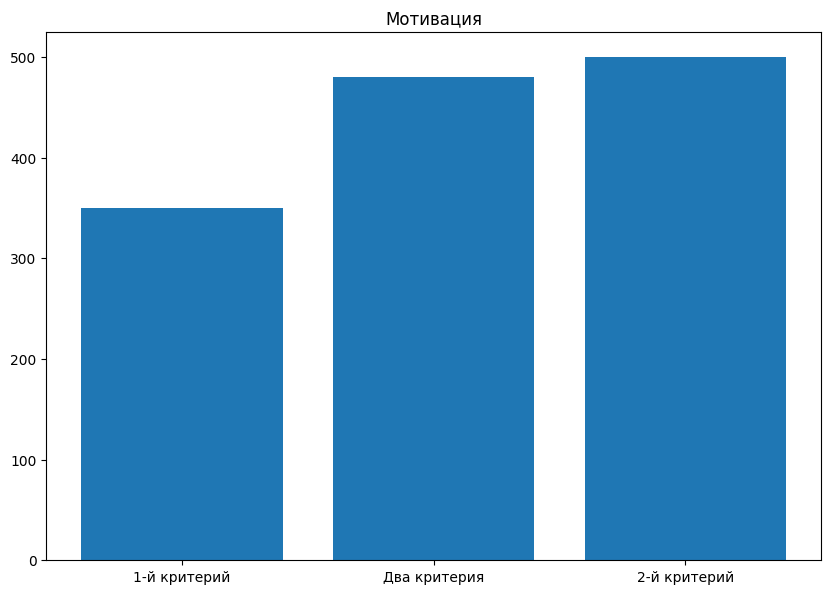

In [73]:
import matplotlib.pyplot as plt

x = np.arange(3)
plt.figure(figsize=(10, 7), dpi=100)
plt.bar(x, height=[350, 480, 500])
plt.xticks(x, ['1-й критерий','Два критерия','2-й критерий'])
plt.title("Мотивация")

Text(0.5, 1.0, 'Зарплата')

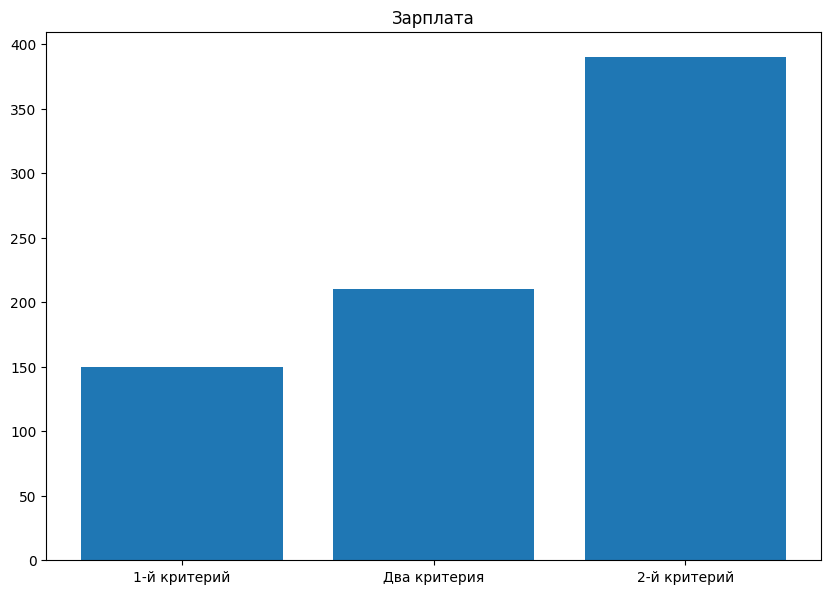

In [74]:
x = np.arange(3)
plt.figure(figsize=(10, 7), dpi=100)
plt.bar(x, height=[150,210,390])
plt.xticks(x, ['1-й критерий','Два критерия','2-й критерий']);
plt.title("Зарплата")

* Распределим незадействованных исполнителей на работы

### По первому критерию

In [77]:
list_salary_fake = [[ 50,  20,  10,  30,  60,  10], 
                    [ 40,  60,  80,  70,  40,  50], 
                    [ 60,  70,  20,  50,  30,  60]] 
list_salary_fake

[[50, 20, 10, 30, 60, 10], [40, 60, 80, 70, 40, 50], [60, 70, 20, 50, 30, 60]]

### По второму критерию

In [78]:
list_motivation_fake = [[90, 60, 50, 30, 50, 80], 
                        [30, 50, 20, 40, 60, 70],  
                        [60, 30, 40, 20, 20, 60]] 
list_motivation_fake

[[90, 60, 50, 30, 50, 80], [30, 50, 20, 40, 60, 70], [60, 30, 40, 20, 20, 60]]

### Ищем суммы для каждого столбца

In [79]:
sum_salary_fake = list(map(sum,zip(*list_salary_fake)))
sum_salary_fake

[150, 150, 110, 150, 130, 120]

In [80]:
sum_motivation_fake = list(map(sum,zip(*list_motivation_fake)))
sum_motivation_fake

[180, 140, 110, 90, 130, 210]

### Нормализуем таблицы

In [81]:
for i in range(6):
  for j in range(3):
    list_salary_fake[j][i]=float(list_salary_fake[j][i])/float(sum_salary_fake[i])
print(np.copy(list_salary_fake))

[[0.33333333 0.13333333 0.09090909 0.2        0.46153846 0.08333333]
 [0.26666667 0.4        0.72727273 0.46666667 0.30769231 0.41666667]
 [0.4        0.46666667 0.18181818 0.33333333 0.23076923 0.5       ]]


In [82]:
for i in range(6):
  for j in range(3):
    list_motivation_fake[j][i]=float(list_motivation_fake[j][i])/float(sum_motivation_fake[i])
print(np.copy(list_motivation_fake))

[[0.5        0.42857143 0.45454545 0.33333333 0.38461538 0.38095238]
 [0.16666667 0.35714286 0.18181818 0.44444444 0.46153846 0.33333333]
 [0.33333333 0.21428571 0.36363636 0.22222222 0.15384615 0.28571429]]


### Таблица с общими критериями

In [83]:
list_comb_fake = list_salary_fake 
for i in range(3):
  for j in range(6):
    list_comb_fake[i][j]=(list_salary_fake[i][j]+list_motivation_fake[i][j])/2

print(np.copy(list_comb_fake))

[[0.41666667 0.28095238 0.27272727 0.26666667 0.42307692 0.23214286]
 [0.21666667 0.37857143 0.45454545 0.45555556 0.38461538 0.375     ]
 [0.36666667 0.34047619 0.27272727 0.27777778 0.19230769 0.39285714]]


### Конвертируем данные в словари

In [95]:
dict_salary_fake = {'Исполнитель1': {'Художник': 50, 'Тестировщик': 20, 'Сценарист': 10, 'Композитор': 30, 'Геймдизайнер': 60, 'Маркетолог': 10},  
                    'Исполнитель7': {'Художник': 40, 'Тестировщик': 60, 'Сценарист': 80, 'Композитор': 70, 'Геймдизайнер': 40, 'Маркетолог': 50},
                    'Исполнитель8': {'Художник': 60, 'Тестировщик': 70, 'Сценарист': 20, 'Композитор': 50, 'Геймдизайнер': 30, 'Маркетолог': 60},
                    'Fake1': {'Художник': 1, 'Тестировщик': 2, 'Сценарист': 3, 'Композитор': 4, 'Геймдизайнер': 7, 'Маркетолог': 5},
                    'Fake2': {'Художник': 2, 'Тестировщик': 1, 'Сценарист': 4, 'Композитор': 3, 'Геймдизайнер': 6, 'Маркетолог': 8},
                    'Fake3': {'Художник': 3, 'Тестировщик': 4, 'Сценарист': 1, 'Композитор': 2, 'Геймдизайнер': 5, 'Маркетолог': 6},
}      

dict_motivation_fake = {'Исполнитель1': {'Художник': 90, 'Тестировщик': 60, 'Сценарист': 50, 'Композитор': 30, 'Геймдизайнер': 50, 'Маркетолог': 80},
                        'Исполнитель7': {'Художник': 30, 'Тестировщик': 50, 'Сценарист': 20, 'Композитор': 40, 'Геймдизайнер': 60, 'Маркетолог': 70},
                        'Исполнитель8': {'Художник': 60, 'Тестировщик': 30, 'Сценарист': 40, 'Композитор': 20, 'Геймдизайнер': 20, 'Маркетолог': 60},
                        'Fake1': {'Художник': 1, 'Тестировщик': 2, 'Сценарист': 3, 'Композитор': 4, 'Геймдизайнер': 5, 'Маркетолог': 6},
                        'Fake2': {'Художник': 7, 'Тестировщик': 8, 'Сценарист': 9, 'Композитор': 1, 'Геймдизайнер': 2, 'Маркетолог': 3},
                        'Fake3': {'Художник': 4, 'Тестировщик': 5, 'Сценарист': 6, 'Композитор': 7, 'Геймдизайнер': 8, 'Маркетолог': 9},}

dict_comb_fake = {'Исполнитель1': {'Художник': 0.41666667, 'Тестировщик': 0.28095238, 'Сценарист': 0.27272727, 'Композитор': 0.26666667, 'Геймдизайнер': 0.42307692, 'Маркетолог': 0.23214286},
                  'Исполнитель7': {'Художник': 0.21666667, 'Тестировщик': 0.37857143, 'Сценарист': 0.45454545, 'Композитор': 0.45555556, 'Геймдизайнер': 0.38461538, 'Маркетолог': 0.375},
                  'Исполнитель8': {'Художник': 0.36666667, 'Тестировщик': 0.34047619, 'Сценарист': 0.27272727, 'Композитор': 0.27777778, 'Геймдизайнер': 0.19230769, 'Маркетолог': 0.39285714},
                  'Fake1': {'Художник': 0.172, 'Тестировщик': 0.1825, 'Сценарист': 0.1855, 'Композитор': 0.1885, 'Геймдизайнер': 0.1814, 'Маркетолог': 0.1811},
                  'Fake2': {'Художник': 0.171, 'Тестировщик': 0.1835, 'Сценарист': 0.1865, 'Композитор': 0.1895, 'Геймдизайнер': 0.1813, 'Маркетолог': 0.1810},
                  'Fake3': {'Художник': 0.1815, 'Тестировщик': 0.1845, 'Сценарист': 0.1875, 'Композитор': 0.1905, 'Геймдизайнер': 0.1812, 'Маркетолог': 0.1824},}

### Поиск по первому критерию

In [91]:
algorithm.find_matching(dict_salary_fake, matching_type = 'max', return_type = 'list' )

[(('Исполнитель9', 'Тестировщик'), 70),
 (('Исполнитель1', 'Геймдизайнер'), 60),
 (('Fake2', 'Маркетолог'), 8),
 (('Fake3', 'Художник'), 3),
 (('Исполнитель2', 'Сценарист'), 80),
 (('Fake1', 'Композитор'), 4)]

### Поиск по второму критерию

In [90]:
algorithm.find_matching(dict_motivation_fake, matching_type = 'max', return_type = 'list' )

[(('Fake3', 'Композитор'), 7),
 (('Fake2', 'Сценарист'), 9),
 (('Исполнитель2', 'Геймдизайнер'), 60),
 (('Исполнитель1', 'Художник'), 90),
 (('Исполнитель9', 'Маркетолог'), 60),
 (('Fake1', 'Тестировщик'), 2)]

### Поиск по двум критериям

In [96]:
algorithm.find_matching(dict_comb_fake, matching_type = 'max', return_type = 'list' )

[(('Исполнитель7', 'Сценарист'), 0.45454545),
 (('Исполнитель1', 'Геймдизайнер'), 0.42307692),
 (('Fake3', 'Художник'), 0.1815),
 (('Fake2', 'Композитор'), 0.1895),
 (('Fake1', 'Тестировщик'), 0.1825),
 (('Исполнитель8', 'Маркетолог'), 0.39285714)]

В результате работы венгерского алгоритма "Исполнитель 1" был назначен геймдизайнером, "Исполнитель 7" сценаристом, а "Исполнитель 8" маректологом.

In [97]:
Salary = [[40,50],
        [60,90],   
        [20,70],
        [40,80],
        [50,90],
        [20,70],
        [20,80],
        [40,60],
        [20,80]]
Summ=0
Motivation=0
for i in range(len(Salary)):
  Summ+=Salary[i][0]
  Motivation+=Salary[i][1]

print("Зарплата:",Summ," ","Мотивация:", Motivation)

Зарплата: 310   Мотивация: 670


Text(0.5, 1.0, 'Мотивация')

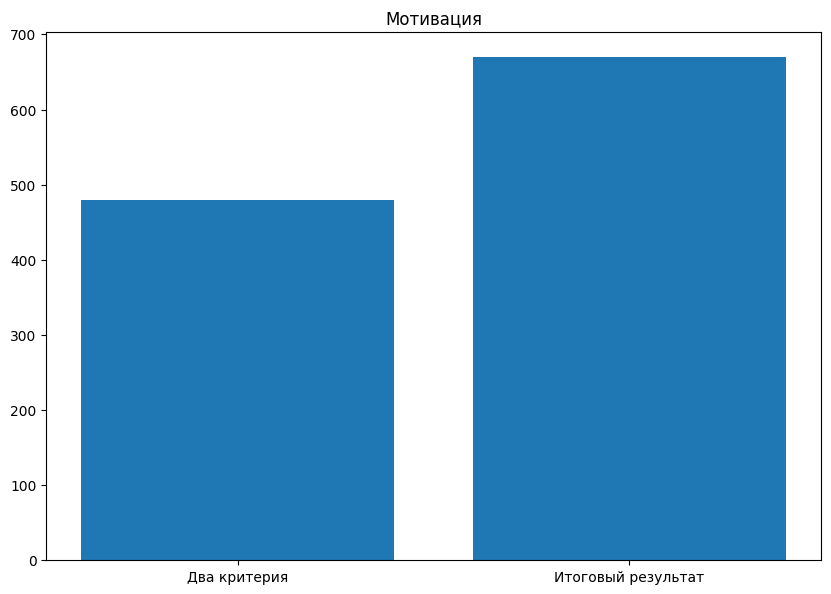

In [102]:
import matplotlib.pyplot as plt

x = np.arange(2)
plt.figure(figsize=(10, 7), dpi=100)
plt.bar(x, height=[480, 670])
plt.xticks(x, ['Два критерия', 'Итоговый результат'])
plt.title("Мотивация")

Text(0.5, 1.0, 'Зарплата')

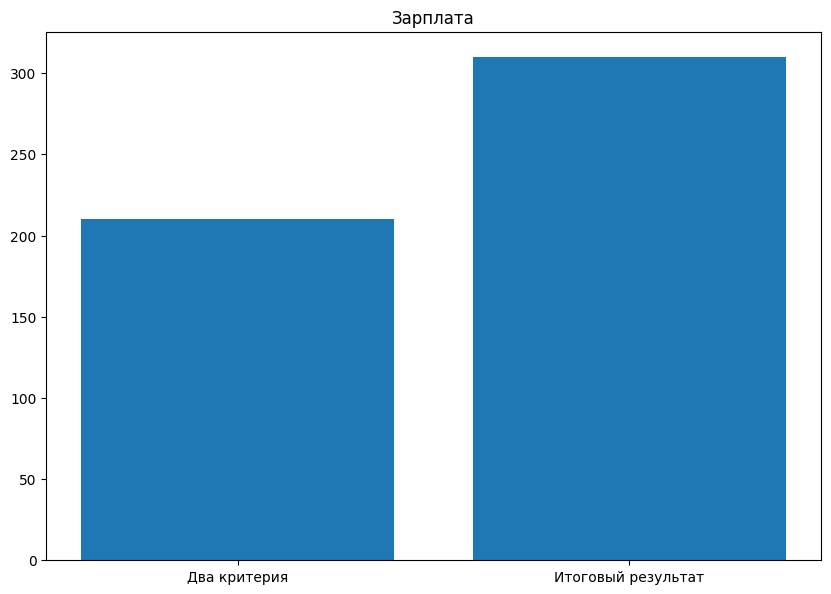

In [106]:
x = np.arange(2)
plt.figure(figsize=(10, 7), dpi=100)
plt.bar(x, height=[210, 310])
plt.xticks(x, ['Два критерия','Итоговый результат']);
plt.title("Зарплата")